# 3. praca z atrybutami nienumerycznymi oraz skalowanie i transformacja wartości

## Dane tekstowe

W zbiorach danych często pojawiają się dane tekstowe mające charakter kategorialny. Z uwagi na fakt, że algorytmy uczenia maszynowego operują tylko i wyłącznie na wartościach numerycznych, dane tekstowe wymagają przetworzenia do postaci liczbowej. W takiej sytuacji z pomocą przychodzi klasa *OrdinalEncoder* zawarta w module *preprocessing* biblioteki *Scikit-learn*.

In [1]:
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)['frame']

In [4]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.'
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.'
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.'


In [3]:
data['protocol_type'].value_counts()

protocol_type
b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
labels = encoder.fit_transform(data[['protocol_type']]).astype('int64')

Interfejs biblioteki *Scikit-learn* umożliwia alternatywne wywoływanie metod *fit* oraz *transform*, które występują po sobie w postaci *fit_transform*.

In [14]:
labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

Uzyskane wartości numeryczne przypisane poszczególnym wartościom tekstowym znalazły się w obiekcie *labels*. Uzyskane wartości można z powodzeniem wykorzystać w ramce danych. Klucz, według którego wartości tekstowe były transformowane do wartości numerycznych znajduje się w atrybucie *categories_* obiektu *encoder*, gdzie pozycja tablicy odpowiada przypisanej liczbie.

In [15]:
encoder.categories_

[array([0., 1., 2.])]

In [16]:
data[['protocol_type']] = labels
data.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
100682,0,0,b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
128983,0,0,b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
88979,0,1,b'http',b'SF',208,10816,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,b'normal.'
74700,0,1,b'smtp',b'SF',1938,326,0,0,0,0,...,145,0.91,0.09,0.04,0.01,0.0,0.0,0.0,0.0,b'normal.'
445952,0,0,b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
271929,0,0,b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
282792,0,0,b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
326377,0,0,b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
79054,0,1,b'http',b'SF',259,8004,0,0,0,0,...,255,1.0,0.0,1.0,0.07,0.0,0.0,0.0,0.0,b'normal.'
457544,245,2,b'other',b'SF',147,105,0,0,0,0,...,2,0.01,0.64,0.95,0.0,0.0,0.0,0.0,0.0,b'normal.'


Algorytmy uczące się posiadają zdolność do rozpoznawania wzorców definiowalnych przez liczby. W związku z tym niektóre z nich mogą bardziej istotnie traktować wartość liczbową przypisaną protokołowi UDP niż protokołowi ICMP. W związku z tym warto rozważyć zastosowanie tzw. **kodowanie gorącojedynkowe**, które polega na utworzeniu wektora rzadkiego o rozmiarze *n* (n = liczba różnych wartości tekstowych) z jedną jedynką na pozycji wskazującej daną kategorię. W tym celu należy wykorzystać klasę *OneHotEncoder*.

In [5]:
from sklearn.preprocessing import OneHotEncoder

data = fetch_kddcup99(as_frame=True)['frame']

encoder = OneHotEncoder()
protocol_onehot = encoder.fit_transform(data[['protocol_type']])

icmp; tcp; udp 

icpm
[1,0,0]

tcp
[0,1,0]

udp
[0,0,1]


Wynikiem jest obiekt zawierający macierz rzadką, co niesie korzyść w postaci oszczędności pamięci. Za pomocą metody *toarray* można jednak dokonać transformacji do postaci tablicy numpy.

In [7]:
protocol_onehot

<494021x3 sparse matrix of type '<class 'numpy.float64'>'
	with 494021 stored elements in Compressed Sparse Row format>

In [8]:
protocol_onehot.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Zastąpienie oryginalnego atrybutu wersją gorącojedynkową niesie za sobą zwiększenie ogólnej liczby atrybutów w ramce. Na każdą kategorię powstaje w takiej sytuacji jeden atrybut.

In [9]:
import pandas as pd

onehot_df = pd.DataFrame(
    protocol_onehot.toarray(),
    columns=encoder.get_feature_names_out(),
    index=data.index
    )

In [10]:
onehot_df

,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
494016,0.0,1.0,0.0
494017,0.0,1.0,0.0
494018,0.0,1.0,0.0
494019,0.0,1.0,0.0


In [11]:
data = data.join(onehot_df)

In [12]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0


## Skalowanie i transformacja atrybutów liczbowych

Wiele algorytmów uczących się źle radzi sobie podczas pracy z atrybutami numerycznymi, których wartości mieszczą się w różnych skalach (np. 0-1 oraz 4-290). Istnieją jednak metody sprawnie umożliwiające transformację wartości w atrybutach do ujednoliconego zakresu.

Jednym z najpopularniejszych podejść do skalowania atrybutów liczbowych jest normalizacja (skalowanie min-max), które polega na umieszczeniu wszystkich wartości w wyznaczonym zakresie (np. 0-1): $x' = \frac{x - min(x)}{max(x) - min(x)}$

W bibliotece *Scikit-learn* do normalizacji służy klasa *MinMaxScaler* zawarta w module *preprocessing*, gdzie można wskazać oczekiwany zakres.

In [13]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1e-9))
src_bytes_scaled = scaler.fit_transform(data[['src_bytes']])

In [14]:
src_bytes_scaled

array([[2.61041764e-16],
       [3.44690506e-16],
       [3.38921627e-16],
       ...,
       [2.92770597e-16],
       [4.19685930e-16],
       [3.15846112e-16]])

In [15]:
src_bytes_scaled.max(), src_bytes_scaled.min()

(1e-09, 0.0)

<Axes: ylabel='Frequency'>

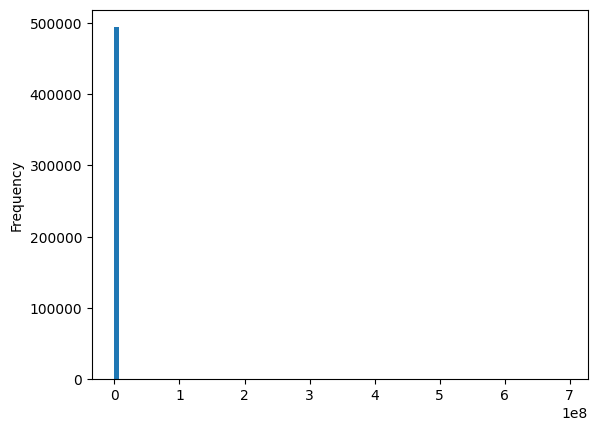

In [19]:
import matplotlib.pyplot as plt

data['src_bytes'].plot.hist(bins=100)

Standaryzacja to proces polegający na wyśrodkowaniu danych oraz zachowaniu wskazanych parametrów dotyczących rozrzutu wartości: $x' = \frac{x - u}{s}$, gdzie $u$ - średnia arytmetyczna, $s$ - odchylenie standardowe. W bibliotece *Scikit-learn* do standaryzacji służy klasa *StandardScaler* zawarta w module *preprocessing*.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dst_bytes_scaled = scaler.fit_transform(data[['dst_bytes']])

In [21]:
dst_bytes_scaled

array([[ 0.13866441],
       [-0.01157787],
       [ 0.01417881],
       ...,
       [ 0.01003232],
       [ 0.01003232],
       [ 0.01106138]])

In [22]:
dst_bytes_scaled.mean(), dst_bytes_scaled.std()

(4.7175730855431825e-18, 1.0000000000000007)

In [23]:
dst_bytes_scaled.min(), dst_bytes_scaled.max()

(-0.026287326600058027, 156.0110317562204)

Gdzie i kiedy stosować normalizację i standaryzację? Zwykle metody dopasowywane są eksperymentalnie. Warto mieć jednak na uwadze, że stadaryzacja jest czuła na wartości odstające, co może wpływać na różnice w zakresie wartości atrybutów.

## Symetria wartości numerycznych

In [24]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)['frame']

In [25]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


W pewnych przypadkach histogramy atrybutów numerycznych potrafią być asymetryczne.

<Axes: >

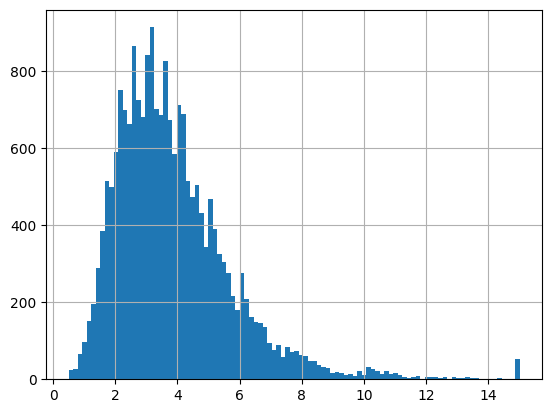

In [52]:
data['MedInc'].hist(bins=100)

Powyższy histogram jest prawoskośny, co oznacza że jego asymetria jest spowodowana nasileniem występowania wartości występujących po lewej stronie histogramu. Analogicznie wygląda sytuacja w przypadku lewoskośności. Rozwiązaniem tego problemu może być zastosowanie skali logarytmicznej lub pierwiastkowej.

In [53]:
import numpy as np

<Axes: >

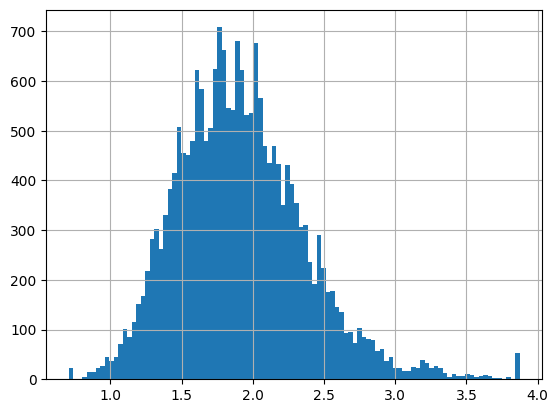

In [54]:
np.sqrt(data['MedInc']).hist(bins=100)

<Axes: >

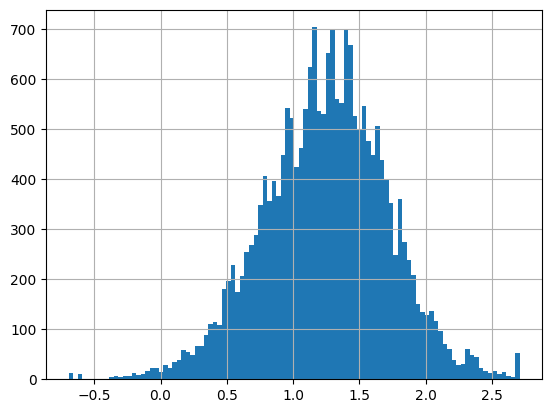

In [55]:
np.log(data['MedInc']).hist(bins=100)